In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# Load data
data = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\Data_transform.csv", header = 0, index_col=0, parse_dates=True, dayfirst=False)

# Select 3 exogenous variables 
data_new = data[['GDP', 'M1', 'M4','M5']]
data_new = data_new.dropna()
display(data_new)

# Split the data into training and testing sets
train_size = int(len(data_new) * 0.8)

GDP_fill_data  = pd.DataFrame(data_new['GDP'])
GDP_fill_data.index = GDP_fill_data.index + pd.offsets.QuarterEnd(0)
GDP_fill_data_train, GDP_fill_data_test = GDP_fill_data[:train_size], GDP_fill_data[train_size:]
display(GDP_fill_data_train)

x_data = pd.DataFrame(data_new.iloc[:, 1:])
x_train, x_test = x_data[:train_size], x_data[train_size:]

display(x_train)

In [3]:
class EchoStateNetwork:
	def __init__(self, reservoir_size, spectral_radius=0.9):
		# Initialize network parameters
		self.reservoir_size = reservoir_size

		# Reservoir weights
		self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5
		self.W_res *= spectral_radius / \
			np.max(np.abs(np.linalg.eigvals(self.W_res)))

		# Input weights
		self.W_in = np.random.rand(reservoir_size, 1) - 0.5

		# Output weights (to be trained)
		self.W_out = None

	def train(self, input_data, target_data):
		# Run reservoir with input data
		reservoir_states = self.run_reservoir(input_data)

		# Train the output weights using pseudo-inverse
		self.W_out = np.dot(np.linalg.pinv(reservoir_states), target_data)

	def predict(self, input_data):
		# Run reservoir with input data
		reservoir_states = self.run_reservoir(input_data)

		# Make predictions using the trained output weights
		predictions = np.dot(reservoir_states, self.W_out)

		return predictions

	def run_reservoir(self, input_data):
		# Initialize reservoir states
		reservoir_states = np.zeros((len(input_data), self.reservoir_size))

		# Run the reservoir
		for t in range(1, len(input_data)):
			reservoir_states[t, :] = np.tanh(
				np.dot(
					self.W_res, reservoir_states[t - 1, :]) + np.dot(self.W_in, input_data[t])
			)

		return reservoir_states


In [4]:
# Generate synthetic data (input: random noise, target: sine wave)
time = np.arange(0, 20, 0.1)
noise = 0.1 * np.random.rand(len(time))
sine_wave_target = np.sin(time)

# Create an Echo State Network
reservoir_size = 50

esn = EchoStateNetwork(reservoir_size)


In [5]:
# Prepare training data
training_input = noise[:, None]
training_target = sine_wave_target[:, None]

# Train the ESN
esn.train(training_input, training_target)

# Generate test data (similar to training data for simplicity)
test_input = noise[:, None]


In [6]:
# Make predictions
predictions = esn.predict(test_input)


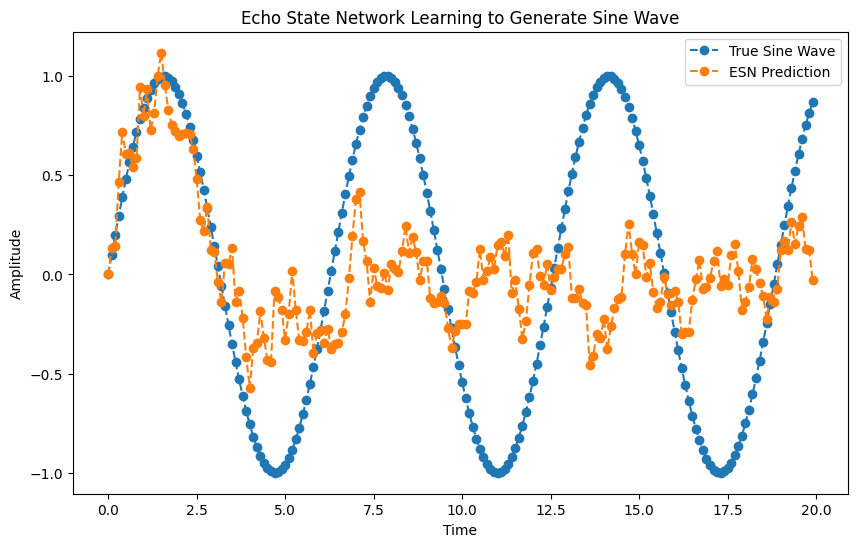

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, sine_wave_target, label='True Sine Wave',
		linestyle='--', marker='o')
plt.plot(time, predictions, label='ESN Prediction', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Echo State Network Learning to Generate Sine Wave')
plt.show()
